In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\revan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# #drop NaN values from the column for plotting
# df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# df_DA_US['salary_year_avg'].sample(10)

507404     97500.0
182490     80500.0
583306     40000.0
748398     56000.0
444115     87500.0
278325    102500.0
221540    123249.5
221103     80190.0
54920     125000.0
14125     110000.0
Name: salary_year_avg, dtype: float64

<Axes: >

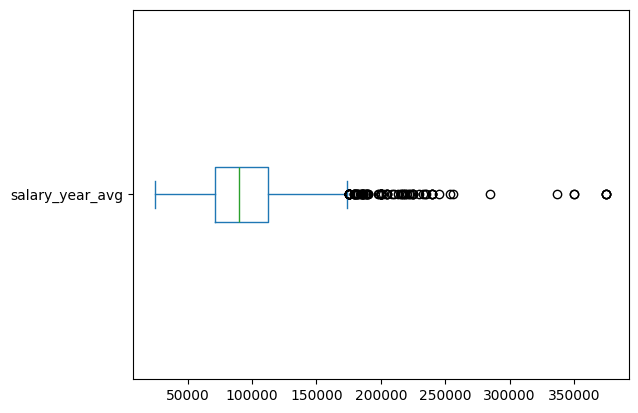

In [12]:
# df_DA_US['salary_year_avg'].plot(kind='box',vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e10ad1fb50>,
 'caps': [<matplotlib.lines.Line2D at 0x1e10ad5cdd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e10a7c45d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e10ad5de50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e10ad5e710>],
 'means': []}

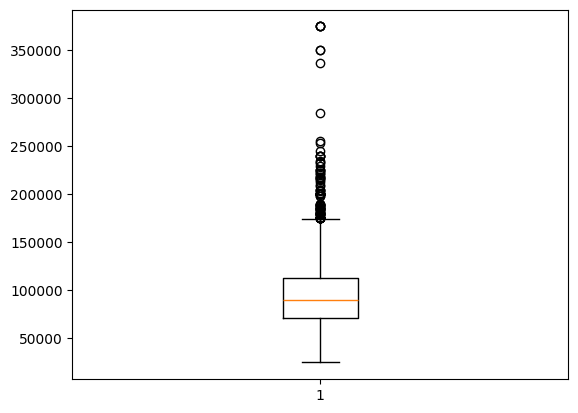

In [11]:
#using matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

C:\Users\revan\AppData\Local\Temp\ipykernel_176\3345590469.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=job_titles, vert = False)


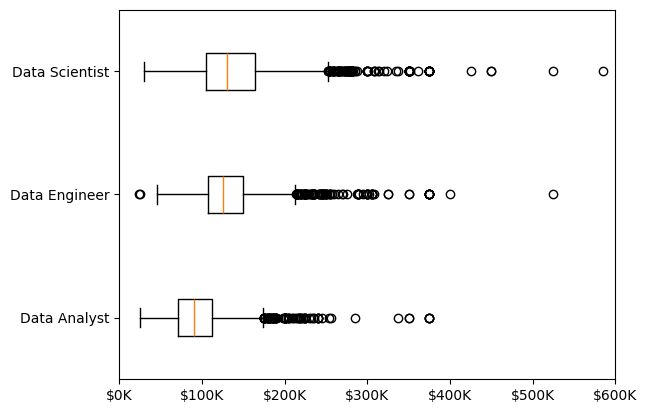

In [27]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#filter the data to appropriate job_titles
#only get data analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list,labels=job_titles, vert = False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()


In [23]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64